In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature Correlation Heatmap'}>

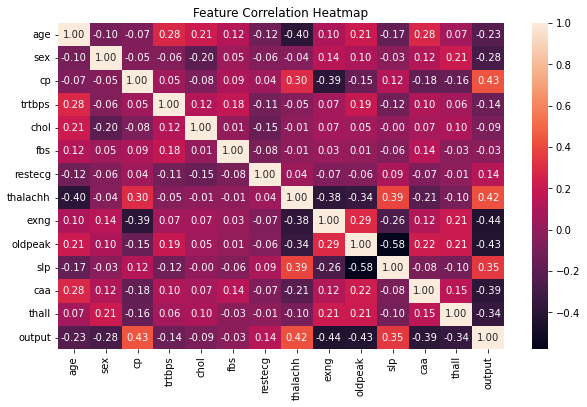

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Feature Correlation Heatmap')
sns.heatmap(df.corr(), annot=True, fmt=".2f")

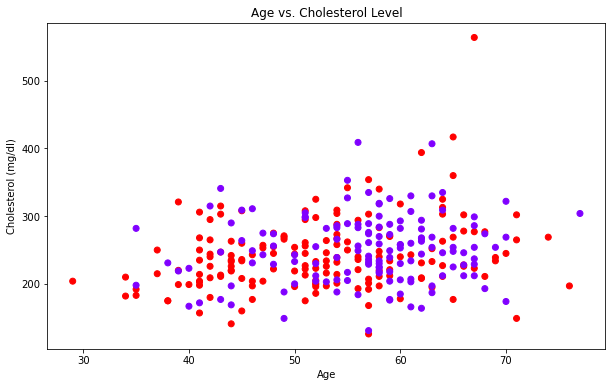

In [8]:
plt.figure(figsize=(10, 6))
plt.title('Age vs. Cholesterol Level')
plt.scatter(df['age'], df['chol'], c=df['output'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

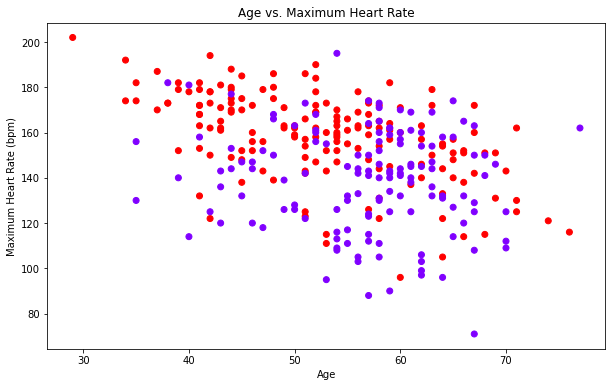

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Age vs. Maximum Heart Rate')
scatter = plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
target_column = 'output'
y = df[target_column]
x = df.drop(columns=[target_column])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
model_scores = {}

In [15]:
logistic_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
]).fit(x_train, y_train)

In [16]:
accuracy = logistic_reg.score(x_test, y_test)

In [17]:
model_scores['Logistic Regression'] = [logistic_reg, accuracy]
print(f'Logistic Regression score: {accuracy:.2f}')

Logistic Regression score: 0.85


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
random_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
]).fit(x_train, y_train)

In [20]:
accuracy = random_forest.score(x_test, y_test)

In [21]:
model_scores['Random Forest'] = [random_forest, accuracy]
print(f'Random Forest score: {accuracy:.2f}')

Random Forest score: 0.87


In [23]:
from sklearn.svm import SVC

In [24]:
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
]).fit(x_train ,y_train)

In [25]:
accuracy = svm.score(x_test, y_test)

In [27]:
model_scores['SVM'] = [svm, accuracy]
print(f'SVM score: {accuracy:.2f}')

SVM score: 0.87


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import Normalizer

In [31]:
gradient_boosting = Pipeline([
    ('normalizer', Normalizer()),
    ('model', GradientBoostingClassifier())
]).fit(x_train, y_train)

In [32]:
accuracy = gradient_boosting.score(x_test, y_test)

In [33]:
model_scores['Gradient Boosting'] = [gradient_boosting, accuracy]
print(f'Gradient Boosting score: {accuracy:.2f}')

Gradient Boosting score: 0.84


In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier())
]).fit(x_train ,y_train)

In [36]:
accuracy = xgb.score(x_test, y_test)

In [38]:
model_scores['XGB'] = [xgb, accuracy]
print(f'XGB score: {accuracy:.2f}')

XGB score: 0.82


Text(0, 0.5, 'Accuracy Score')

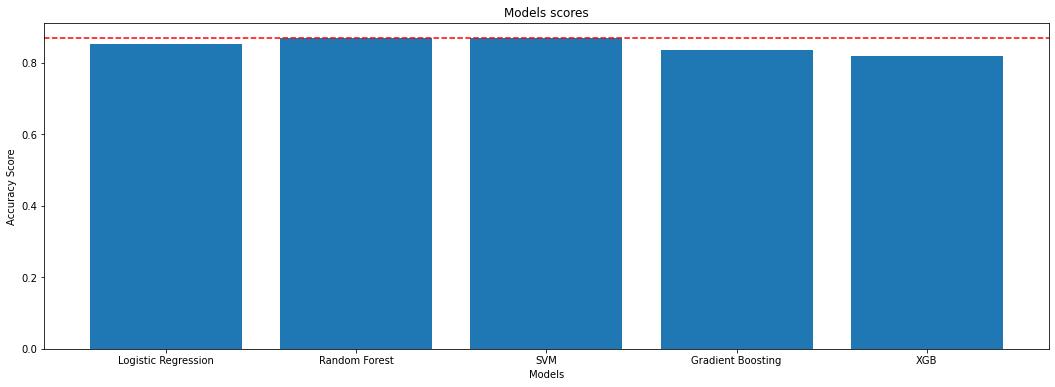

In [50]:
max_score = max(model_scores.values(), key=lambda x: x[1])[1]

plt.figure(figsize=(18, 6))
plt.title('Models scores')
plt.bar(model_scores.keys(), [score[1] for score in model_scores.values()])
plt.axhline(y=max_score, color='r', linestyle='--')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

In [52]:
best_models = sorted(model_scores.items(), key=lambda x: x[1][1], reverse=True)[:3]
print(f'The best models are: {[model[0] for model in best_models]}')

The best models are: ['Random Forest', 'SVM', 'Logistic Regression']


In [53]:
from sklearn.ensemble import StackingClassifier

In [54]:
estimators = [(name, model[0]) for name, model in best_models]

stacking_clf = Pipeline([
    ('normalizer', Normalizer()),
    ('stacking_classifier', StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=10,
        n_jobs=-1,
        passthrough=True,
        verbose=2))
]).fit(x_train ,y_train)

In [55]:
score = stacking_clf.score(x_test, y_test)
print(f'Stacking Classifier score: {score:.2f}')

Stacking Classifier score: 0.87


In [57]:
y_pred = stacking_clf.predict(x_test)    

In [58]:
print("First 10 predictions:", y_pred[:10])
print("First 10 actual values:", y_test[:10].values)

First 10 predictions: [0 1 1 0 1 1 1 0 0 0]
First 10 actual values: [0 0 1 0 1 1 1 0 0 1]


In [62]:
from sklearn.metrics import classification_report

In [75]:
clf_report = pd.DataFrame(classification_report(
    y_test,
    y_pred,
    target_names=['No heart disease', 'Heart disease'],
    output_dict=True)).T
clf_report

,precision,recall,f1-score,support
No heart disease,0.862069,0.862069,0.862069,29.000000
Heart disease,0.875000,0.875000,0.875000,32.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.868534,0.868534,0.868534,61.000000
weighted avg,0.868852,0.868852,0.868852,61.000000


In [64]:
from sklearn.metrics import confusion_matrix

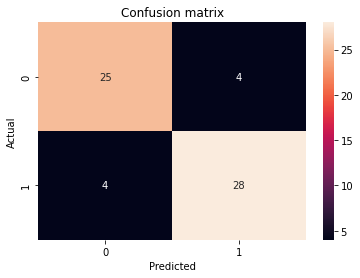

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, fmt='d',)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
import joblib

In [79]:
joblib.dump(stacking_clf, 'heart_disease_model.joblib')

['heart_disease_model.joblib']